In [ ]:
#Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

In [ ]:
#Load in data
#CODE WILL NOT RUN UNLESS YOU UPLOAD THE DATA FILE TO THE SESSION
dat=pd.read_csv('finalprojectdata.csv') #Loaded in from local drive

In [ ]:
#Data Cleaning
mlbdat=dat[dat['Season'] != 2020] #Remove the 2020 season due to it's shortend nature

#Yearly Subset for future analysis
y19=mlbdat[mlbdat['Season']==2019]
y21=mlbdat[mlbdat['Season']==2021]
y22=mlbdat[mlbdat['Season']==2022]
y23=mlbdat[mlbdat['Season']==2023]

mlbdat.describe() #Initial Data Exploraton

,Rk,Season,W,GP,W.1,L,WL%,ERA,G,CG,...,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/BB
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,...,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,60.500000,2021.250000,80.983333,161.966667,80.983333,80.983333,0.499975,4.271333,161.966667,1.383333,...,57.250000,6120.758333,102.266667,4.269750,1.303608,8.475000,1.247500,3.260000,8.763333,2.733333
std,34.785054,1.485221,14.391865,0.180258,14.391865,14.367905,0.088734,0.598160,0.180258,1.403377,...,12.776192,130.487064,12.225289,0.448796,0.102547,0.647847,0.197447,0.398189,0.676985,0.448119
min,1.000000,2019.000000,47.000000,161.000000,47.000000,51.000000,0.292000,2.800000,161.000000,0.000000,...,29.000000,5785.000000,75.000000,3.280000,1.048000,6.900000,0.800000,2.400000,7.200000,1.870000
25%,30.750000,2020.500000,71.000000,162.000000,71.000000,70.750000,0.438000,3.870000,162.000000,0.000000,...,48.750000,6036.250000,94.750000,3.975000,1.239000,8.000000,1.100000,2.975000,8.400000,2.350000
50%,60.500000,2021.500000,82.000000,162.000000,82.000000,80.000000,0.506000,4.205000,162.000000,1.000000,...,56.500000,6100.000000,102.500000,4.230000,1.294500,8.400000,1.200000,3.200000,8.750000,2.710000
75%,90.250000,2022.250000,91.250000,162.000000,91.250000,91.000000,0.563500,4.705000,162.000000,2.000000,...,64.250000,6230.500000,109.000000,4.490000,1.381250,8.800000,1.400000,3.525000,9.200000,3.062500
max,120.000000,2023.000000,111.000000,162.000000,111.000000,114.000000,0.685000,5.850000,162.000000,6.000000,...,98.000000,6423.000000,145.000000,5.570000,1.546000,10.200000,1.900000,4.400000,10.300000,3.880000


In [ ]:
#Store variables to  potentially use for future comparison in code or view
#Wins
avgWins=mlbdat['W'].mean() #Find mean wins over the last 4 years
medWins=mlbdat['W'].median() #Find median win value over the last 4 years
maxWins=mlbdat['W'].max()#Locate maximum wins
minWins=mlbdat['W'].min()#Locate minimum wins

80.98333333333333


Average By Season: Season
2019    724.600000
2021    673.300000
2022    633.100000
2023    691.266667
Name: ER, dtype: float64
Number of teams: 13 teams % of teams: 0.10833333333333334
(-0.1429900210049232, 184.57723588683402, -0.8206428323357752, 2.8103816119455424e-08)
(-0.13700568693367302, 173.2125956791087, -0.8733411957818423, 3.036910683682621e-10)
(-0.14965497771411954, 175.74656639080908, -0.8718233174732282, 3.5532594110549014e-10)
(-0.13106758230362717, 171.60265072708734, -0.7966699996081527, 1.3886488213966852e-07)


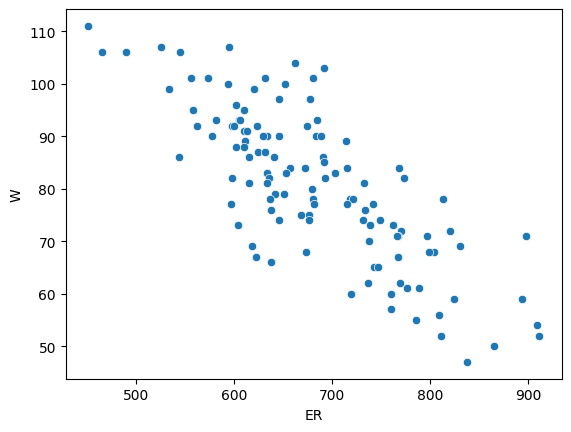

In [ ]:
#Earned Run Analysis

#Subset Averages for Comparison
avgER=mlbdat['ER'].mean() #create Average Earned Runs Variable
erComp=mlbdat[(mlbdat['W']>avgWins) & (mlbdat['ER'] >avgER)] #establish data frame of unoffical outliers

#Run Regressions
ER19=stats.linregress(y19['ER'],y19['W'])
ER21=stats.linregress(y21['ER'],y21['W'])
ER22=stats.linregress(y22['ER'],y22['W'])
ER23=stats.linregress(y23['ER'],y23['W'])

#Display Results
sns.scatterplot(data=mlbdat,x='ER',y='W') #plot data
print('Average By Season:',mlbdat.groupby('Season')['ER'].agg('mean')) #Print Averages
print('Number of teams:',len(erComp), 'teams','% of teams:',len(erComp)/len(mlbdat)) #Print Outliers and %
print(ER19[0:4]) #Print Slope, Intercept, Correlation, and P value for regression
print(ER21[0:4])
print(ER22[0:4])
print(ER23[0:4])

Average By Season: Season
2019    102.066667
2021    102.666667
2022    102.500000
2023    101.833333
Name: ERA+, dtype: float64
Number of teams: 13 teams % of teams: 0.10833333333333334
(1.1158800426041804, -32.92748968180001, 0.8248692858881579, 2.0694149921833147e-08)
(0.8973583149074829, -11.16212033050158, 0.8716933714623836, 3.6010160027338383e-10)
(0.9200631324853774, -13.30647107975119, 0.8539278129720811, 1.9727770533293608e-09)
(1.1270030792433856, -33.766480236284764, 0.8212988974950153, 2.681388450875377e-08)


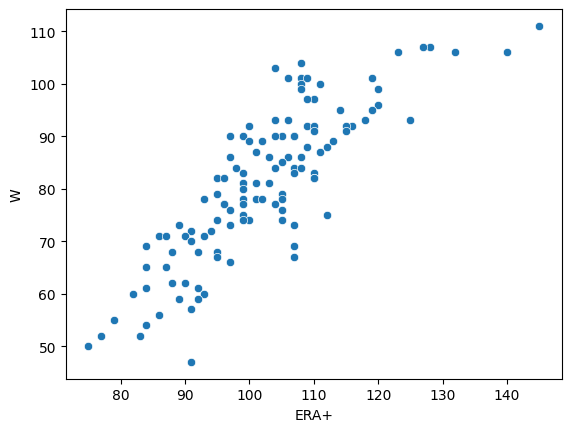

In [ ]:
#ERA+ Analysis

#Subset Averages for Comparison
avgERAp=mlbdat['ERA+'].mean() #create Average Earned Runs Variable
erapComp=mlbdat[(mlbdat['W']>avgWins) & (mlbdat['ERA+'] <avgERAp)] #establish data frame of unoffical outliers

#Run Regressions
ERAp19=stats.linregress(y19['ERA+'],y19['W'])
ERAp21=stats.linregress(y21['ERA+'],y21['W'])
ERAp22=stats.linregress(y22['ERA+'],y22['W'])
ERAp23=stats.linregress(y23['ERA+'],y23['W'])

#Display Results
sns.scatterplot(data=mlbdat,x='ERA+',y='W') #plot data
print('Average By Season:',mlbdat.groupby('Season')['ERA+'].agg('mean')) #Print Averages
print('Number of teams:',len(erapComp), 'teams','% of teams:',len(erapComp)/len(mlbdat)) #Print Outliers and %
print(ERAp19[0:4]) #Print Slope, Intercept, Correlation, and P value for regression
print(ERAp21[0:4])
print(ERAp22[0:4])
print(ERAp23[0:4])

Average By Season: Season
2019    4.507667
2021    4.268000
2022    3.969333
2023    4.334000
Name: FIP, dtype: float64
Number of teams: 14 teams % of teams: 0.11666666666666667
(-27.317514152402136, 204.10491462764472, -0.7747060707771993, 5.039871039682109e-07)
(-30.495336325725013, 211.12076210486103, -0.8774435821240987, 1.9664170060738405e-10)
(-32.50635582485641, 210.02856172079672, -0.8695343198916238, 4.4859529329239565e-10)
(-26.526392845837286, 195.9653865938588, -0.7548031880909118, 1.4411166829942223e-06)


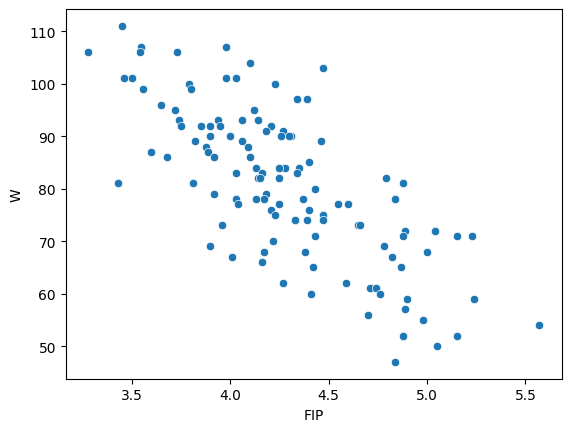

In [ ]:
#FIP Analysis

#Subset Averages for Comparison
avgFIP=mlbdat['FIP'].mean() #create Average Earned Runs Variable
fipComp=mlbdat[(mlbdat['W']>avgWins) & (mlbdat['FIP'] >avgFIP)] #establish data frame of unoffical outliers

#Run Regressions
fip19=stats.linregress(y19['FIP'],y19['W'])
fip21=stats.linregress(y21['FIP'],y21['W'])
fip22=stats.linregress(y22['FIP'],y22['W'])
fip23=stats.linregress(y23['FIP'],y23['W'])

#Display Results
sns.scatterplot(data=mlbdat,x='FIP',y='W') #plot data
print('Average By Season:',mlbdat.groupby('Season')['FIP'].agg('mean')) #Print Averages
print('Number of teams:',len(fipComp), 'teams','% of teams:',len(fipComp)/len(mlbdat)) #Print Outliers and %
print(fip19[0:4]) #Print Slope, Intercept, Correlation, and P value for regression
print(fip21[0:4])
print(fip22[0:4])
print(fip23[0:4])

Average By Season: Season
2019    1.334533
2021    1.297833
2022    1.266467
2023    1.315600
Name: WHIP, dtype: float64
Number of teams: 13 teams % of teams: 0.10833333333333334
(-120.10439692974562, 241.2499878493099, -0.7635351967768861, 9.20298124842702e-07)
(-127.44238145388002, 246.36563739689396, -0.8360614064424072, 8.834156250776384e-09)
(-122.95367607551862, 236.71673229377512, -0.8736524329521204, 2.939958885366762e-10)
(-103.3642763443829, 216.98604195867014, -0.8048579873872984, 8.247346387196478e-08)


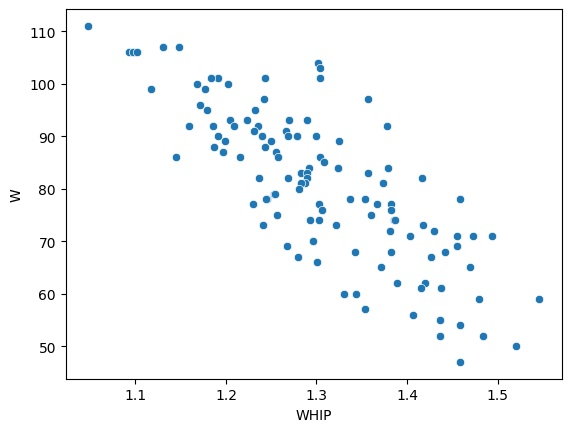

In [ ]:
#WHIP Analysis

#Subset Averages for Comparison
whipavg=mlbdat['WHIP'].mean() #create Average Earned Runs Variable
whipComp=mlbdat[(mlbdat['W']>avgWins) & (mlbdat['WHIP'] >whipavg)] #establish data frame of unoffical outliers

#Run Regressions
whip19=stats.linregress(y19['WHIP'],y19['W'])
whip21=stats.linregress(y21['WHIP'],y21['W'])
whip22=stats.linregress(y22['WHIP'],y22['W'])
whip23=stats.linregress(y23['WHIP'],y23['W'])

#Display Results
sns.scatterplot(data=mlbdat,x='WHIP',y='W') #plot data
print('Average By Season:',mlbdat.groupby('Season')['WHIP'].agg('mean')) #Print Averages
print('Number of teams:',len(whipComp), 'teams','% of teams:',len(whipComp)/len(mlbdat)) #Print Outliers and %
print(whip19[0:4]) #Print Slope, Intercept, Correlation, and P value for regression
print(whip21[0:4])
print(whip22[0:4])
print(whip23[0:4])

Average By Season: Season
2019    225.866667
2021    198.133333
2022    173.833333
2023    195.600000
Name: HR, dtype: float64
Number of teams: 17 teams % of teams: 0.14166666666666666
(-0.34349764086743506, 158.551333817258, -0.6151527886321279, 0.0002973159178067095)
(-0.3922628259274559, 158.6870079104266, -0.7403395874735713, 2.9130996182880084e-06)
(-0.38526186658631845, 147.9713544749217, -0.6063823425964494, 0.0003823464062224725)
(-0.33967450114703707, 147.44033242436046, -0.4620647751645296, 0.01015161698306207)


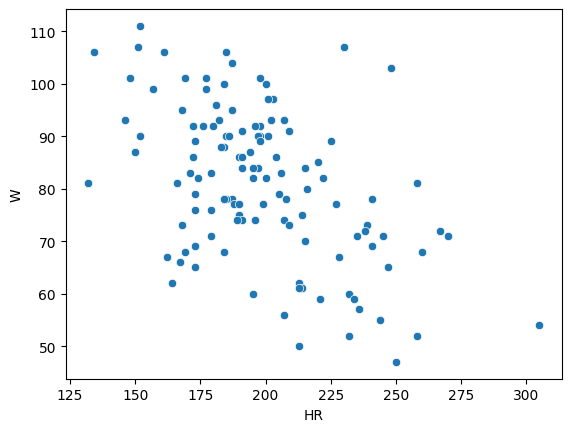

In [ ]:
#HR Analysis
#Subset Averages for Comparison
HRavg=mlbdat['HR'].mean() #create Average Earned Runs Variable
hrComp=mlbdat[(mlbdat['W']>avgWins) & (mlbdat['HR'] >HRavg)] #establish data frame of unoffical outliers

#Run Regressions
HR19=stats.linregress(y19['HR'],y19['W'])
HR21=stats.linregress(y21['HR'],y21['W'])
HR22=stats.linregress(y22['HR'],y22['W'])
HR23=stats.linregress(y23['HR'],y23['W'])

#Display Results
sns.scatterplot(data=mlbdat,x='HR',y='W') #plot data
print('Average By Season:',mlbdat.groupby('Season')['HR'].agg('mean')) #Print Averages
print('Number of teams:',len(hrComp), 'teams','% of teams:',len(hrComp)/len(mlbdat)) #Print Outliers and %
print(HR19[0:4]) #Print Slope, Intercept, Correlation, and P value for regression
print(HR21[0:4])
print(HR22[0:4])
print(HR23[0:4])